# Library Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import kagglehub

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib

# Data Loading

In [2]:
path = kagglehub.dataset_download("abdallahwagih/movies")

print("Path to dataset files:", path)

100%|██████████| 5.13M/5.13M [00:00<00:00, 31.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/movies/versions/1


In [3]:
# Read Dataset
file_path = path + "/movies.csv"
df = pd.read_csv(file_path)

# Data Understanding

## Exploratory Data Analysis

Berikut adalah EDA yang akan dilakukan:
- Melihat bentuk dataset dan tipe data pada dataset
- Melihat apakah ada missing value
- Melihat distribusi data pada dataset

### Melihat bentuk dataset dan tipe data pada dataset

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


Berikut adalah penjelasan dari variabel-variabel dataset ini:

* `index`: Indeks baris (tidak relevan secara analitis, hanya penomoran)
* `budget`: Anggaran produksi film (dalam satuan USD)
* `genres`: Daftar genre film (misalnya: Action, Comedy)
* `homepage`: URL homepage resmi film
* `id`: ID unik film (biasanya dari TMDB)
* `keywords`: Kata kunci terkait film (tag-topik relevan)
* `original_language`: Bahasa asli film (misalnya: en, fr)
* `original_title`: Judul asli film dalam bahasa produksinya
* `overview`: Ringkasan atau deskripsi singkat alur cerita film
* `popularity`: Skor popularitas film (dihitung oleh TMDB berdasarkan beberapa faktor)
* `production_companies`: Daftar perusahaan produksi yang terlibat
* `production_countries`: Daftar negara tempat film diproduksi
* `release_date`: Tanggal rilis film
* `revenue`: Total pendapatan kotor film (dalam USD)
* `runtime`: Durasi film (dalam menit)
* `spoken_languages`: Bahasa-bahasa yang digunakan dalam film
* `status`: Status rilis film (misalnya: Released, Post Production)
* `tagline`: Slogan atau kalimat promosi film
* `title`: Judul film (dalam format publik)
* `vote_average`: Rata-rata skor penilaian dari pengguna TMDB
* `vote_count`: Jumlah total suara/penilaian yang diberikan pengguna
* `cast`: Daftar aktor/aktris utama yang membintangi film
* `crew`: Daftar tim kru produksi (editor, penulis, dll)
* `director`: Nama sutradara film

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [6]:
df.dtypes

,0
index,int64
budget,int64
genres,object
homepage,object
id,int64
keywords,object
original_language,object
original_title,object
overview,object
popularity,float64


### Melihat apakah ada missing value

In [7]:
df.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


Ditemukan beberapa variabel yang memiliki missing value. Hal ini akan ditangani di bagian Data Preparation.

### Melihat distribusi data pada dataset (Univariate Analysis)

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

#### Distribusi Data Kategorikal

In [9]:
for feature in categorical_features:
    print(f"\nDistribusi untuk fitur kategorikal: {feature.upper()}")
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    cat_df = pd.DataFrame({'Jumlah Sampel': count, 'Persentase (%)': percent.round(1)})
    print(cat_df.head(10))


Distribusi untuk fitur kategorikal: GENRES
                      Jumlah Sampel  Persentase (%)
genres                                             
Drama                           370             7.7
Comedy                          282             5.9
Drama Romance                   164             3.4
Comedy Romance                  144             3.0
Comedy Drama                    142             3.0
Comedy Drama Romance            109             2.3
Horror Thriller                  88             1.8
Documentary                      68             1.4
Horror                           64             1.3
Drama Thriller                   62             1.3

Distribusi untuk fitur kategorikal: HOMEPAGE
                                              Jumlah Sampel  Persentase (%)
homepage                                                                   
http://www.missionimpossible.com/                         4             0.2
http://www.thehungergames.movie/                          

#### Distribusi Data Numerikal

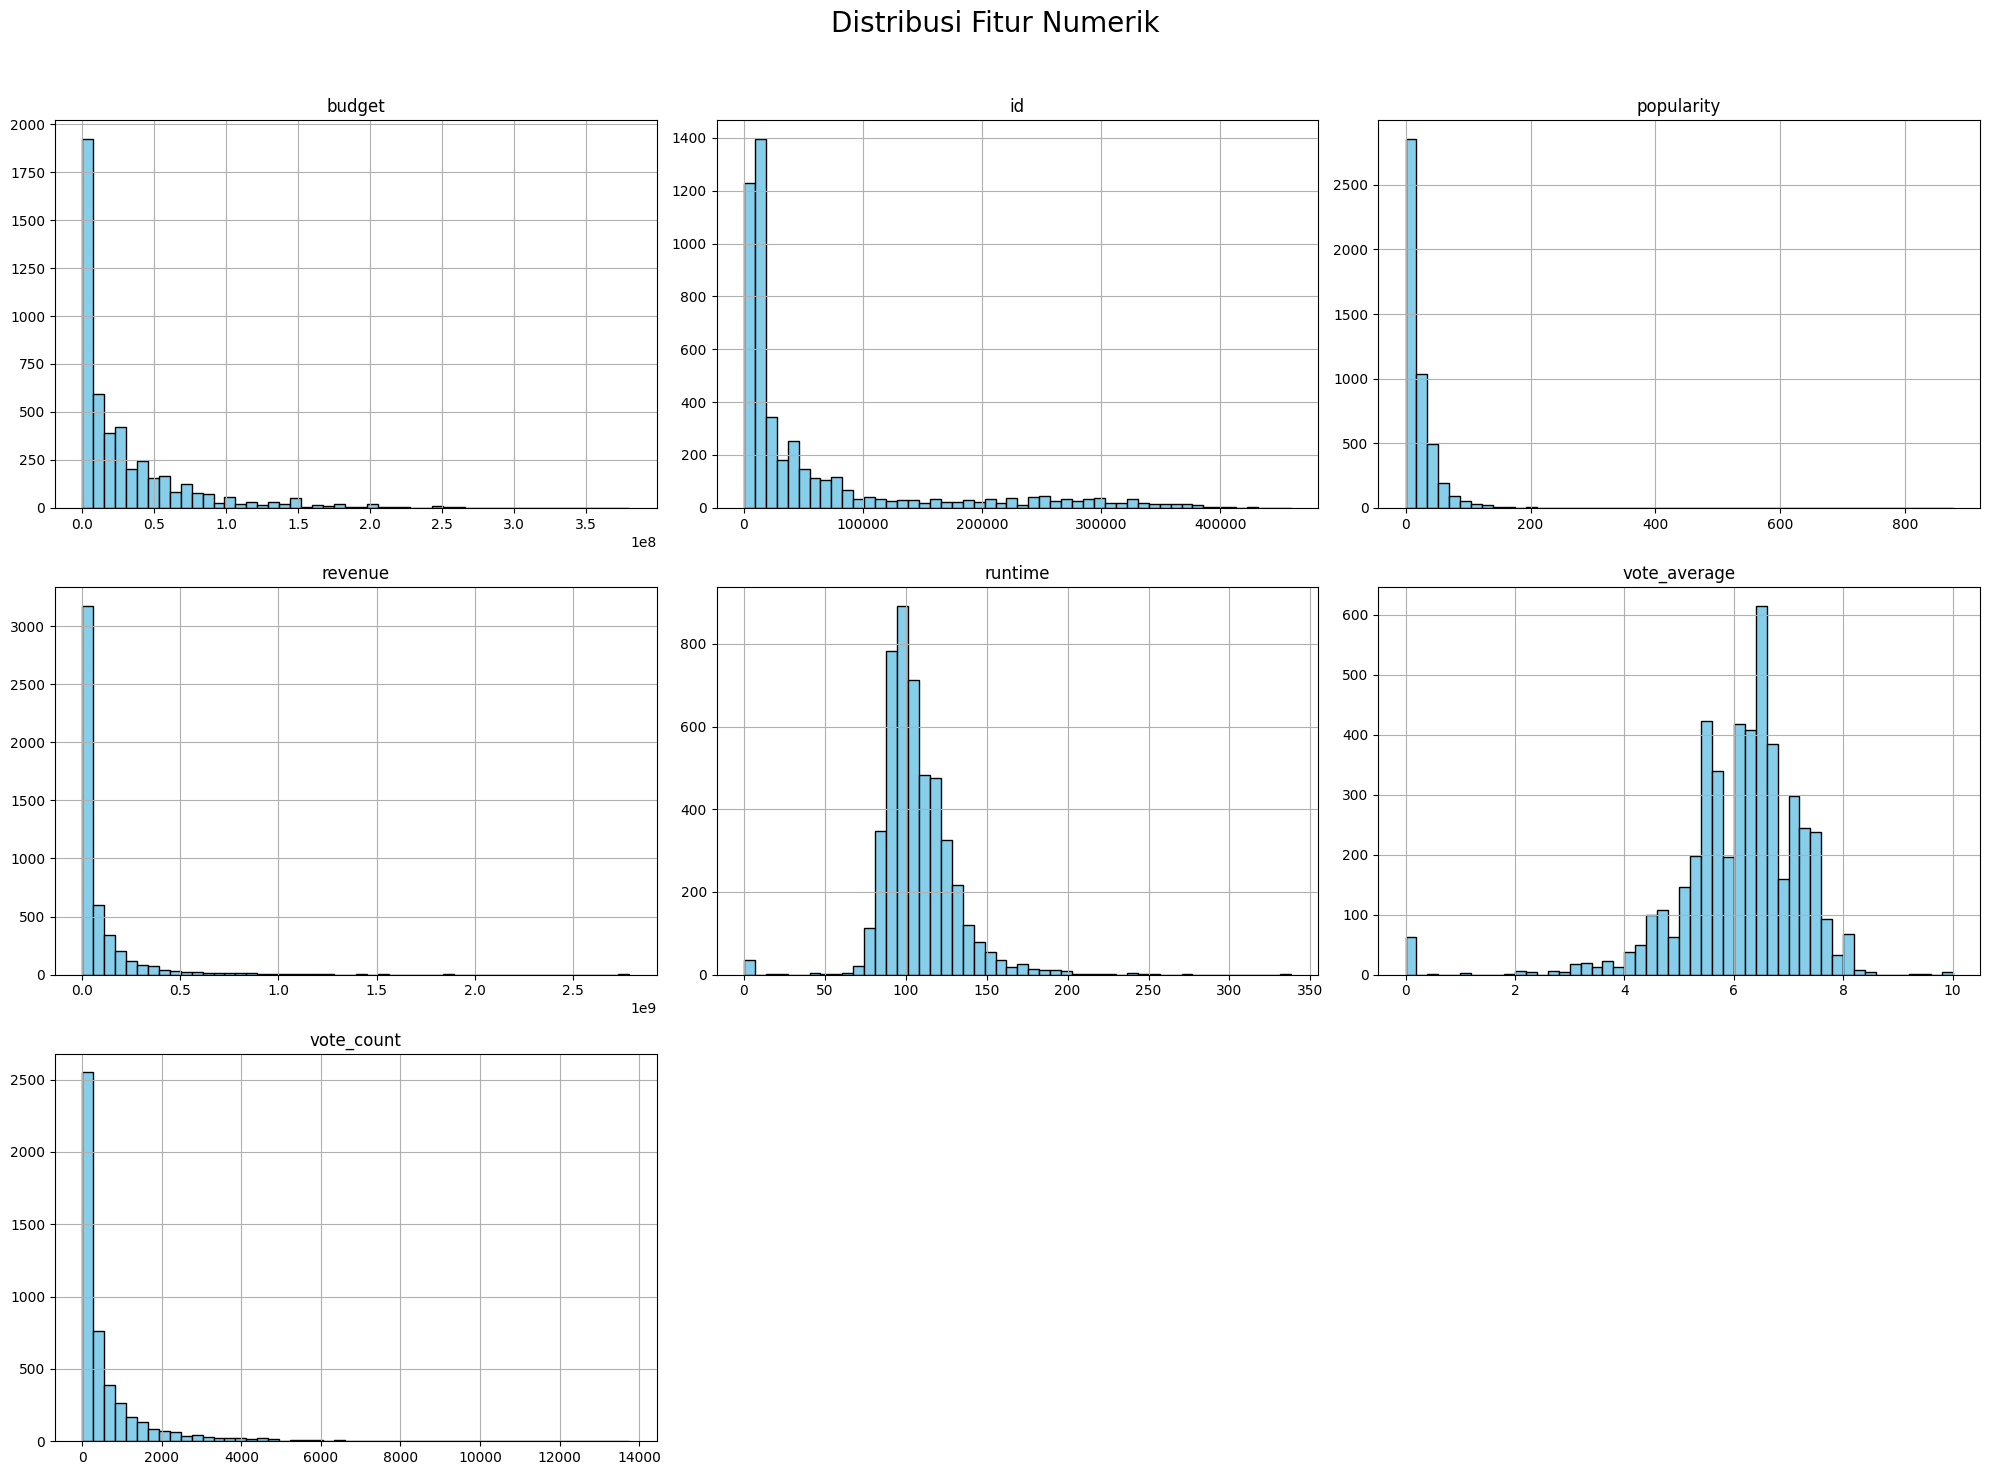

In [10]:
if 'index' in numerical_features:
    numerical_features.remove('index')

df[numerical_features].hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Insight: Karena variabel Index tidak akan hanya sebuah penomoran dan tidak akan digunakan, maka tidak dilakukan plotting variabel Index

# Data Preparation

Berikut adalah hal yang dilakukan di Data Preparation:
- Seleksi Fitur
- Menangani Missing Value
- Penggabungan Fitur

## Seleksi Fitur

In [40]:
fitur = ['genres','keywords', 'cast','director']

## Menangani Missing Value

Agar lebih efektif, missing value yang ditangani hanya akan dilakukan terhadap features yang terpilih.

In [41]:
for i in fitur:
    df[i] = df[i].fillna('')

## Penggabungan Fitur

In [42]:
fitur_gabungan = df['genres'] + ' ' + df['keywords'] + ' ' + df['cast'] + ' ' + df['director']

# Modeling

## TF-IDF Vectorization

In [46]:
vectorizer = TfidfVectorizer()

vector = vectorizer.fit_transform(fitur_gabungan)

## Cosine Similarity

In [47]:
similarity = cosine_similarity(vector)

# Inference

In [55]:
# Fungsi untuk rekomendasi film
def recommend_movies(movie_title, similarity_matrix=similarity, df=df, top_n=10):
    movie_list = df['title'].tolist()
    close_matches = difflib.get_close_matches(movie_title, movie_list, n=1, cutoff=0.5)

    if not close_matches:
        print("Movie not found in the database.")
        return

    closest_match = close_matches[0]
    movie_index = df[df['title'] == closest_match].index[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    print(f"\nRekomendasi film mirip dengan '{closest_match}':\n")
    recommended = 0
    for idx, score in similarity_scores[1:top_n+1]:  # skip the input movie itself
        print(f"{recommended+1}. {df.iloc[idx]['title']}")
        recommended += 1

# Inferensi
user_input = input("Masukkan judul film: ")
recommend_movies(user_input, top_n=10)

Masukkan judul film: Avengers

Rekomendasi film mirip dengan 'The Avengers':

1. Avengers: Age of Ultron
2. Iron Man 2
3. Captain America: The Winter Soldier
4. Captain America: Civil War
5. Thor: The Dark World
6. The Incredible Hulk
7. X-Men
8. X2
9. Ant-Man
10. X-Men: Apocalypse
